Install packages first in order to be able to install libraries

In [ ]:
!pip3 install pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Eric\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Import required libraries

In [2]:
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

Prompt pandas to read my dataset

In [4]:
df = pd.read_csv(r'C:\Users\Eric\Desktop\DAC Group 1 Internal Project Datasets\Video_Games.csv')

In [9]:
df.shape

(64016, 14)

Cleaning the Data

Many Null rows (BAD)

In [ ]:
# View the number of null rows according to its column names
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

No duplicated rows (GOOD)

In [14]:
# View the number of duplicate rows according to its column names
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


Exploring the Video Games Dataset

Formatting the Dates to make them easier to read.

In [ ]:
#converting ['release_date'] and ['last_update'] into date-time format => more uniform data => easier plotting => better analysis 
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

Dropping rows with invalid dates

In [ ]:
# Drop rows with invalid release dates
df = df.dropna(subset=['release_date'])

Lost some rows but thats okay. A bit less date but more accurate.

In [21]:
df.shape

(56965, 14)

Reading the rows in "release_date" column by year

In [22]:
# Extract year and month for trend analysis
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

C:\Users\Eric\AppData\Local\Temp\ipykernel_12580\498382061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year
C:\Users\Eric\AppData\Local\Temp\ipykernel_12580\498382061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_month'] = df['release_date'].dt.month


Grouping the rows in "release_date" by year together i.e. Total number of games published year by year.
Then plot a graph to show a trend

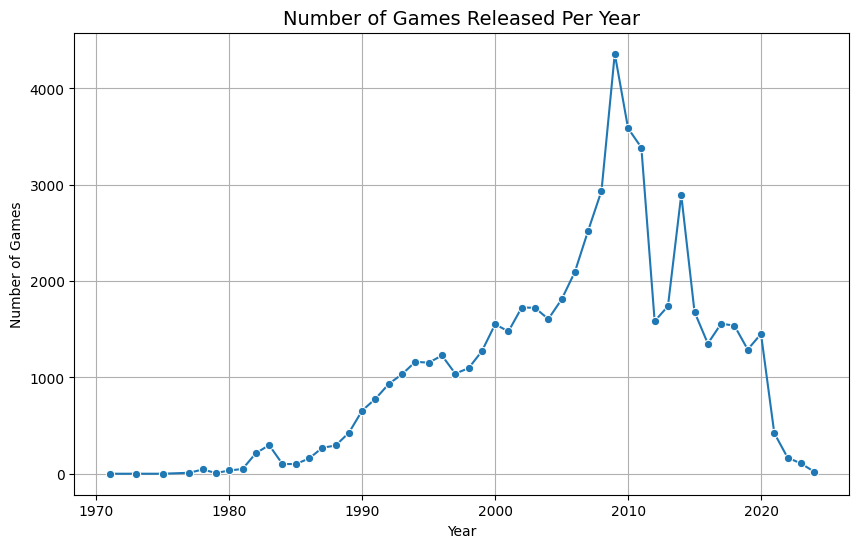

In [23]:
# Group by release year and count games
games_per_year = df.groupby('release_year').size()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker="o")
plt.title("Number of Games Released Per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.grid()
plt.show()


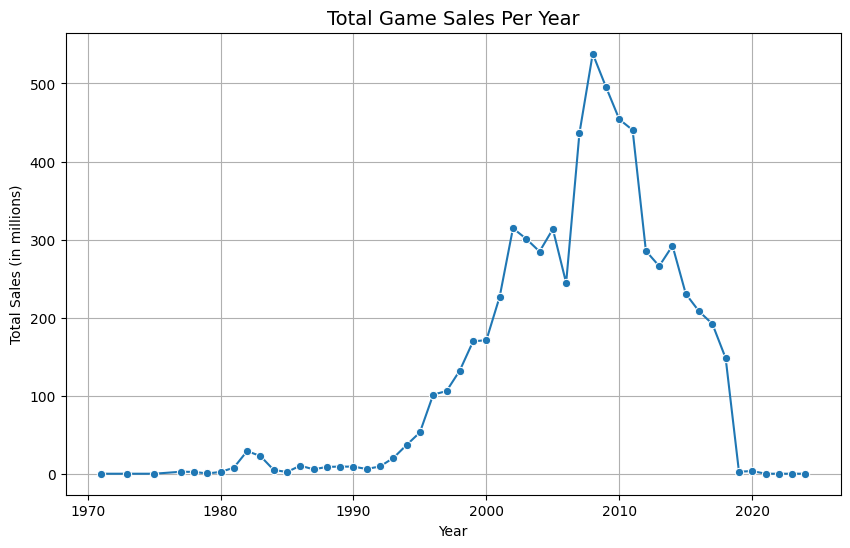

In [24]:
# Group by release year and sum total sales
sales_per_year = df.groupby('release_year')['total_sales'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values, marker="o")
plt.title("Total Game Sales Per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.grid()
plt.show()


<Figure size 1200x800 with 0 Axes>

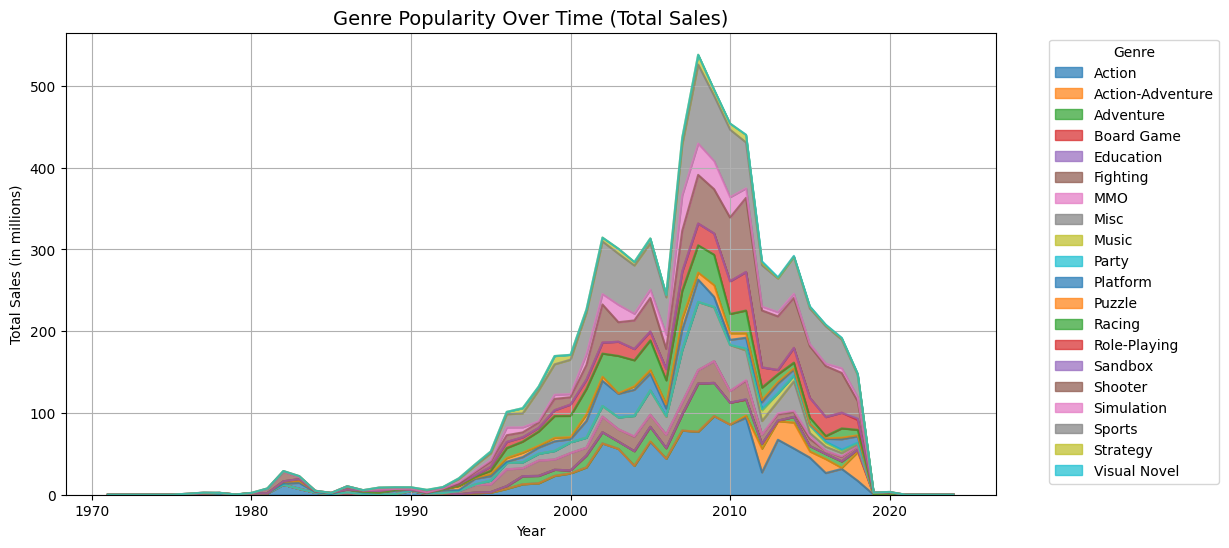

In [31]:
# Group by year and genre
genre_trend = df.groupby(['release_year', 'genre'])['total_sales'].sum().unstack()

# Plot
plt.figure(figsize=(12, 8))
genre_trend.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.7)
plt.title("Genre Popularity Over Time (Total Sales)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()




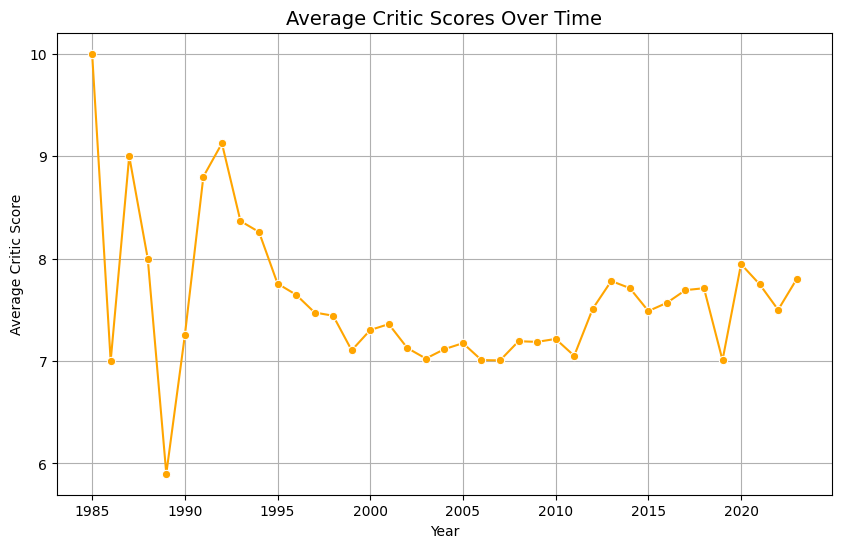

In [26]:
# Group by release year and compute mean critic score
critic_score_trend = df.groupby('release_year')['critic_score'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=critic_score_trend.index, y=critic_score_trend.values, marker="o", color="orange")
plt.title("Average Critic Scores Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Critic Score")
plt.grid()
plt.show()


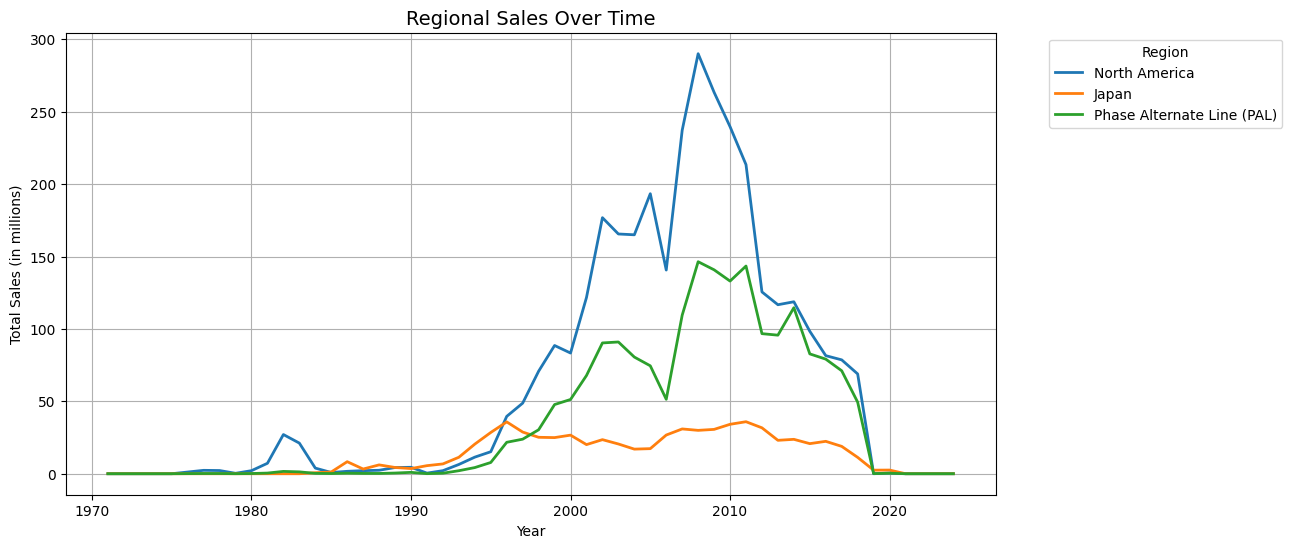

In [ ]:
# Group by release year and sum regional sales
regional_sales = df.groupby('release_year')[['na_sales', 'jp_sales', 'pal_sales']].sum()

# Plot
ax = regional_sales.plot(figsize=(12, 6), linewidth=2)

# Customize the legend (without this it will literally show na_sales, jp_sales, pal_sales in the legend which is difficult to read)
custom_labels = ['North America', 'Japan', 'Phase Alternate Line (PAL)']
ax.legend(custom_labels, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.title("Regional Sales Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Sales (in millions)")
plt.grid()

# Show the plot
plt.show()